### SetUp

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import os
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
keras = tf.keras

2024-03-15 18:17:39.481346: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 18:17:42.883054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 18:17:42.893870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 18:17:57.004554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Load Dataset

In [3]:
dataset, info = tfds.load("glue/sst2", with_info = True)
print(info.features)
print(info.features['label'].num_classes)
print(info.features['label'].names)

FeaturesDict({
    'idx': int32,
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'sentence': Text(shape=(), dtype=string),
})
2
['negative', 'positive']


#### Get the train and test Dataset

In [5]:
dataset_train, dataset_test = dataset['train'], dataset['test']
dataset_train

<_PrefetchDataset element_spec={'idx': TensorSpec(shape=(), dtype=tf.int32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sentence': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [19]:
# print some entries
for example in dataset_train.take(2):
    review, label = example['sentence'], example['label']
    print("Review: ",str(review.numpy()))
    print("Label: ",label.numpy())

Review:  b'for the uninitiated plays better on video with the sound '
Label:  0
Review:  b'like a giant commercial for universal studios , where much of the action takes place '
Label:  0


2024-03-15 18:35:28.861909: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [23]:
print(f"Train length: {len(dataset_train)}")
print(f"Test length: {len(dataset['test'])}")

Train length: 67349
Test length: 1821


In [58]:
reviews = []
labels = []

train_reviews = []
train_labels = []

test_reviews = []
test_labels = []

for item in dataset_train.take(20000):
    reviews.append(str(item['sentence'].numpy()))
    labels.append(item['label'].numpy())
    
len_reviews = len(reviews)
print(f"No. of reviews examples: {len_reviews}")

split = int(len_reviews * 0.8)

train_reviews = reviews[:split]
train_labels = labels[:split]

test_reviews = reviews[split:]
test_labels = labels[split:]

# print some examples
print(f"No of train examples: {len(train_reviews)}")
for i in range(33, 36):
    print("Review: ",train_reviews[i])
    print("Label: ",train_labels[i])
print("\n\n")



"""
for item in dataset_test.take(1000):
    review, label = item['sentence'], item['label']
    test_reviews.append(str(review.numpy()))
    test_labels.append(label.numpy())
"""
print(f"No of test example: {len(test_reviews)}")
for i in range(33, 36):
    print("Review: ",test_reviews[i])
    print("Label: ",test_labels[i])

No. of reviews examples: 20000
No of train examples: 16000
Review:  b"is as blasphemous and nonsensical as a luis bu\xc3\xb1uel film without the latter 's attendant intelligence , poetry , passion , and genius . "
Label:  0
Review:  b'at heart is a sweet little girl '
Label:  1
Review:  b"'s suspenseful enough for older kids but not too scary "
Label:  1



No of test example: 4000
Review:  b'conventional , but well-crafted film '
Label:  1
Review:  b"limited and so embellished by editing that there 's really not much of a sense of action or even action-comedy "
Label:  0
Review:  b'a wal-mart budget '
Label:  0


2024-03-15 20:59:24.496604: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Tokenize the words and sequence the sentence

In [59]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, "'": 2, 'the': 3, 'and': 4, 'a': 5, 'of': 6, 'b': 7, 'to': 8, "'s": 9, 'in': 10, 'that': 11, 'is': 12, 'it': 13, 'as': 14, "b'a": 15, 'with': 16, 'film': 17, 'movie': 18, 'for': 19, "b'the": 20, 'its': 21, 'an': 22, 'this': 23, 'but': 24, 'you': 25, "n't": 26, 'on': 27, 'be': 28, "b'is": 29, 'by': 30, 'not': 31, 'at': 32, 'more': 33, 'than': 34, 'one': 35, "b'": 36, 'about': 37, 'or': 38, 'from': 39, 'all': 40, 'like': 41, 'so': 42, 'his': 43, 'out': 44, 'good': 45, 'have': 46, 'are': 47, 'up': 48, 'has': 49, 'most': 50, 'story': 51, 'who': 52, 'too': 53, 'into': 54, 'i': 55, 'characters': 56, 'comedy': 57, 'your': 58, 'time': 59, 'funny': 60, 'does': 61, 'just': 62, "b'of": 63, 'much': 64, 'well': 65, "b'an": 66, 'even': 67, 'if': 68, 'their': 69, 'what': 70, 'little': 71, 'life': 72, 'can': 73, "''": 74, 'will': 75, "b'that": 76, 'no': 77, 'bad': 78, 'which': 79, 'love': 80, 'best': 81, 'very': 82, 'work': 83, 'been': 84, "b'to": 85, 'action': 86, 'way': 87, 'any': 88, '

### Pad the sequences

In [60]:
train_seq = tokenizer.texts_to_sequences(train_reviews)
train_padded = pad_sequences(train_seq, padding = padding_type,
                            truncating = trunc_type, maxlen = max_length)

test_seq = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_seq, padding = padding_type,
                           maxlen = max_length, truncating = trunc_type)

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)
train_labels_final

array([0, 0, 1, ..., 0, 0, 1])

### Create the model using an Embedding

In [61]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
         optimizer = 'adam',
         metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 16)            64000     
                                                                 
 global_average_pooling1d_6  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 6)                 102       
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 64109 (250.43 KB)
Trainable params: 64109 (250.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-15 20:59:59.963030: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


#### Train the model

In [62]:
EPOCHS = 20
history = model.fit(train_padded, train_labels_final, 
                   epochs = EPOCHS,
                   validation_data = (test_padded, test_labels_final))

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 0.6843 - accuracy: 0.5546 - val_loss: 0.6782 - val_accuracy: 0.5598
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 0.6578 - accuracy: 0.5964 - val_loss: 0.6212 - val_accuracy: 0.6495
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 0.5465 - accuracy: 0.7396 - val_loss: 0.5145 - val_accuracy: 0.7433
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8055 - val_loss: 0.4581 - val_accuracy: 0.7780
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3844 - accuracy: 0.8319 - val_loss: 0.4331 - val_accuracy: 0.7850
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8429 - val_loss: 0.4179 - val_accuracy: 0.7903
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3250 - accuracy: 0.8551 - val_loss: 0.4097 - val_accuracy: 0.7952
Epoch 

### Plot the accuracy and loss

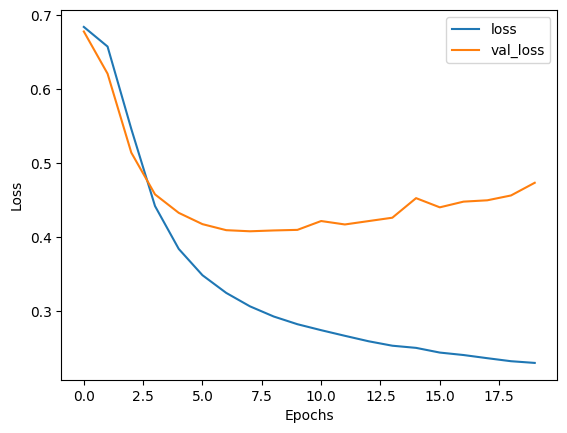

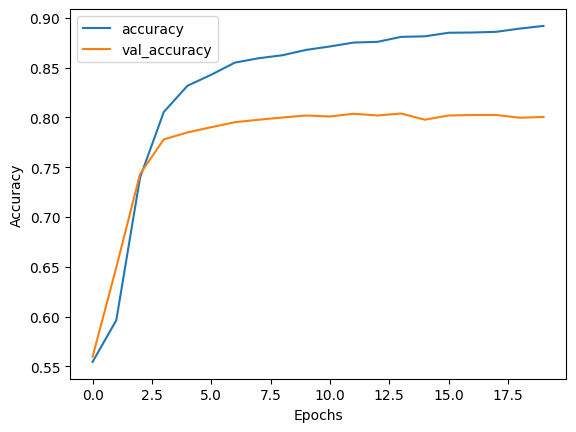

In [69]:
def plot_graphs(history, string):
    val_string = f"val_{string}"
    
    plt.plot(history.history[string])
    plt.plot(history.history[val_string])
    plt.ylabel(string.capitalize())
    plt.xlabel("Epochs")
    plt.legend([string, val_string])
    plt.show()

plot_graphs(history, "loss")
plot_graphs(history, "accuracy")

### Function to predict some sentiment of reviews

In [70]:
review1 = """I loved this movie"""
review2 = """that was the worst movie I've ever seen"""
review3 = """too much violence even for a bond film"""
review4 = """a captivating recounting of a cherished myth"""

new_reviews = [review1, review2, review3, review4]

In [76]:
def predict_reviews(model, reviews):
    padding_type = "post"
    review_sequences = tokenizer.texts_to_sequences(reviews)
    review_padded = pad_sequences(review_sequences, maxlen = max_length,
                                 padding = padding_type)
    
    pred_labels = model.predict(review_padded)
    for _ in range(len(pred_labels)):
        print(reviews[_])
        print(pred_labels[_], end = "\n\n")
predict_reviews(model, new_reviews)

1/1 [==============================] - 0s 20ms/step
I loved this movie
[0.684538]

that was the worst movie I've ever seen
[0.02860948]

too much violence even for a bond film
[0.0243162]

a captivating recounting of a cherished myth
[0.97751784]



### Define a function to train and show the results of models with different layers

In [81]:
def fit_model_and_show_results(model, reviews):
    model.summary()
    hist = model.fit(train_padded, train_labels_final, epochs = EPOCHS,
                    validation_data = (test_padded, test_labels_final))
    plot_graphs(hist, "accuracy")
    plot_graphs(hist, "loss")
    predict_reviews(model, reviews)

### Use a CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            64000     
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           10368     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 75149 (293.55 KB)
Trainable params: 75149 (293.55 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

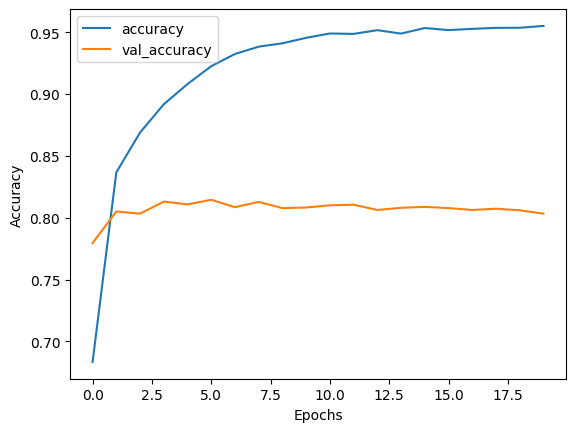

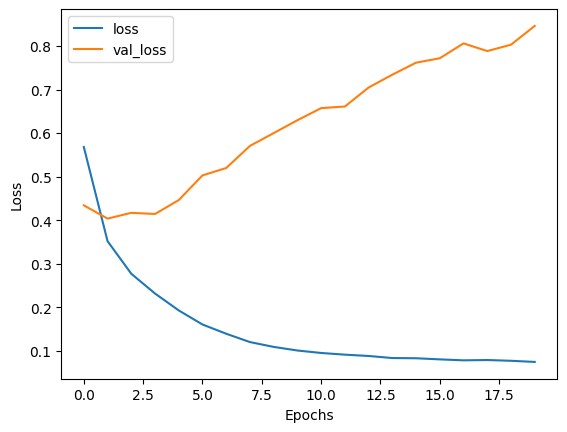

1/1 [==============================] - 0s 90ms/step
I loved this movie
[0.96916074]

that was the worst movie I've ever seen
[4.0392075e-05]

too much violence even for a bond film
[1.4703913e-05]

a captivating recounting of a cherished myth
[0.99963814]



In [85]:
model_cnn = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.Conv1D(128, 5, activation = 'relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model_cnn.compile(loss = keras.losses.BinaryCrossentropy(),
             optimizer = keras.optimizers.Adam(),
             metrics = ['accuracy'])
fit_model_and_show_results(model_cnn, new_reviews)

### Use a GRU

In [ ]:
model_gru = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedi)
])